In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
import sklearn

wr.filterwarnings('ignore') 

In [2]:
df = pd.read_excel(r'C:\Users\TUAN.NGUYEN\Desktop\ProductUtilization.xlsx')

In [3]:
df.shape

(1754, 5)

In [4]:
df.head()

,Unnamed: 0,Custom Product Group,Completed/Due Date,Search Volume,Order Volume
0,1,Public Records,2024-06-10,472191,98748
1,2,Public Records,2024-04-22,394318,81799
2,3,Public Records,2024-08-12,375628,88133
3,4,Public Records,2024-07-30,369018,101868
4,5,Public Records,2024-05-08,355400,94363


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df = df.rename(columns={
    "Custom Product Group": "ProductGroup", 
    "Completed/Due Date": "CompletedDate", 
    "Search Volume": "Searches",
    "Order Volume": "Orders"
})
df.head()

,ProductGroup,CompletedDate,Searches,Orders
0,Public Records,2024-06-10,472191,98748
1,Public Records,2024-04-22,394318,81799
2,Public Records,2024-08-12,375628,88133
3,Public Records,2024-07-30,369018,101868
4,Public Records,2024-05-08,355400,94363


In [7]:
df = df.sort_values(by=['ProductGroup', 'CompletedDate'], ascending = [True, True])

df.reset_index(inplace = True, drop = True)
df.head()

,ProductGroup,CompletedDate,Searches,Orders
0,Compliance,2024-01-01,306,306
1,Compliance,2024-01-02,1162,1104
2,Compliance,2024-01-03,3915,3870
3,Compliance,2024-01-04,3899,3851
4,Compliance,2024-01-05,4164,4115


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProductGroup   1754 non-null   object        
 1   CompletedDate  1754 non-null   datetime64[ns]
 2   Searches       1754 non-null   int64         
 3   Orders         1754 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 54.9+ KB


In [9]:
# Number of Null Values in Each Column
df.isna().sum()

ProductGroup     0
CompletedDate    0
Searches         0
Orders           0
dtype: int64

In [10]:
df.groupby(['ProductGroup']).size()

ProductGroup
Compliance                        280
Drug/Health                       239
FBI/FINRA Fingerprinting          238
Financial & Business/Diligence    160
Identity                          235
Other                               2
Public Records                    314
Verifications                     286
dtype: int64

In [11]:
# Remove "other" and "fin/BD" records from DF
df = df[~df['ProductGroup'].isin(['Other', 'Financial & Business/Diligence'])]
df.groupby(['ProductGroup']).size()

ProductGroup
Compliance                  280
Drug/Health                 239
FBI/FINRA Fingerprinting    238
Identity                    235
Public Records              314
Verifications               286
dtype: int64

In [12]:
#Filter to see only records before this week
df = df[df['CompletedDate'] < '2024-08-19']

In [13]:
df['CompletedWeek'] = df['CompletedDate'].dt.to_period('W').dt.to_timestamp()
df['CompletedMonth'] = df['CompletedDate'].dt.to_period('M').dt.to_timestamp()
df['CompletedQuarter'] = df['CompletedDate'].dt.to_period('Q').dt.to_timestamp()
df.head()

,ProductGroup,CompletedDate,Searches,Orders,CompletedWeek,CompletedMonth,CompletedQuarter
0,Compliance,2024-01-01,306,306,2024-01-01,2024-01-01,2024-01-01
1,Compliance,2024-01-02,1162,1104,2024-01-01,2024-01-01,2024-01-01
2,Compliance,2024-01-03,3915,3870,2024-01-01,2024-01-01,2024-01-01
3,Compliance,2024-01-04,3899,3851,2024-01-01,2024-01-01,2024-01-01
4,Compliance,2024-01-05,4164,4115,2024-01-01,2024-01-01,2024-01-01


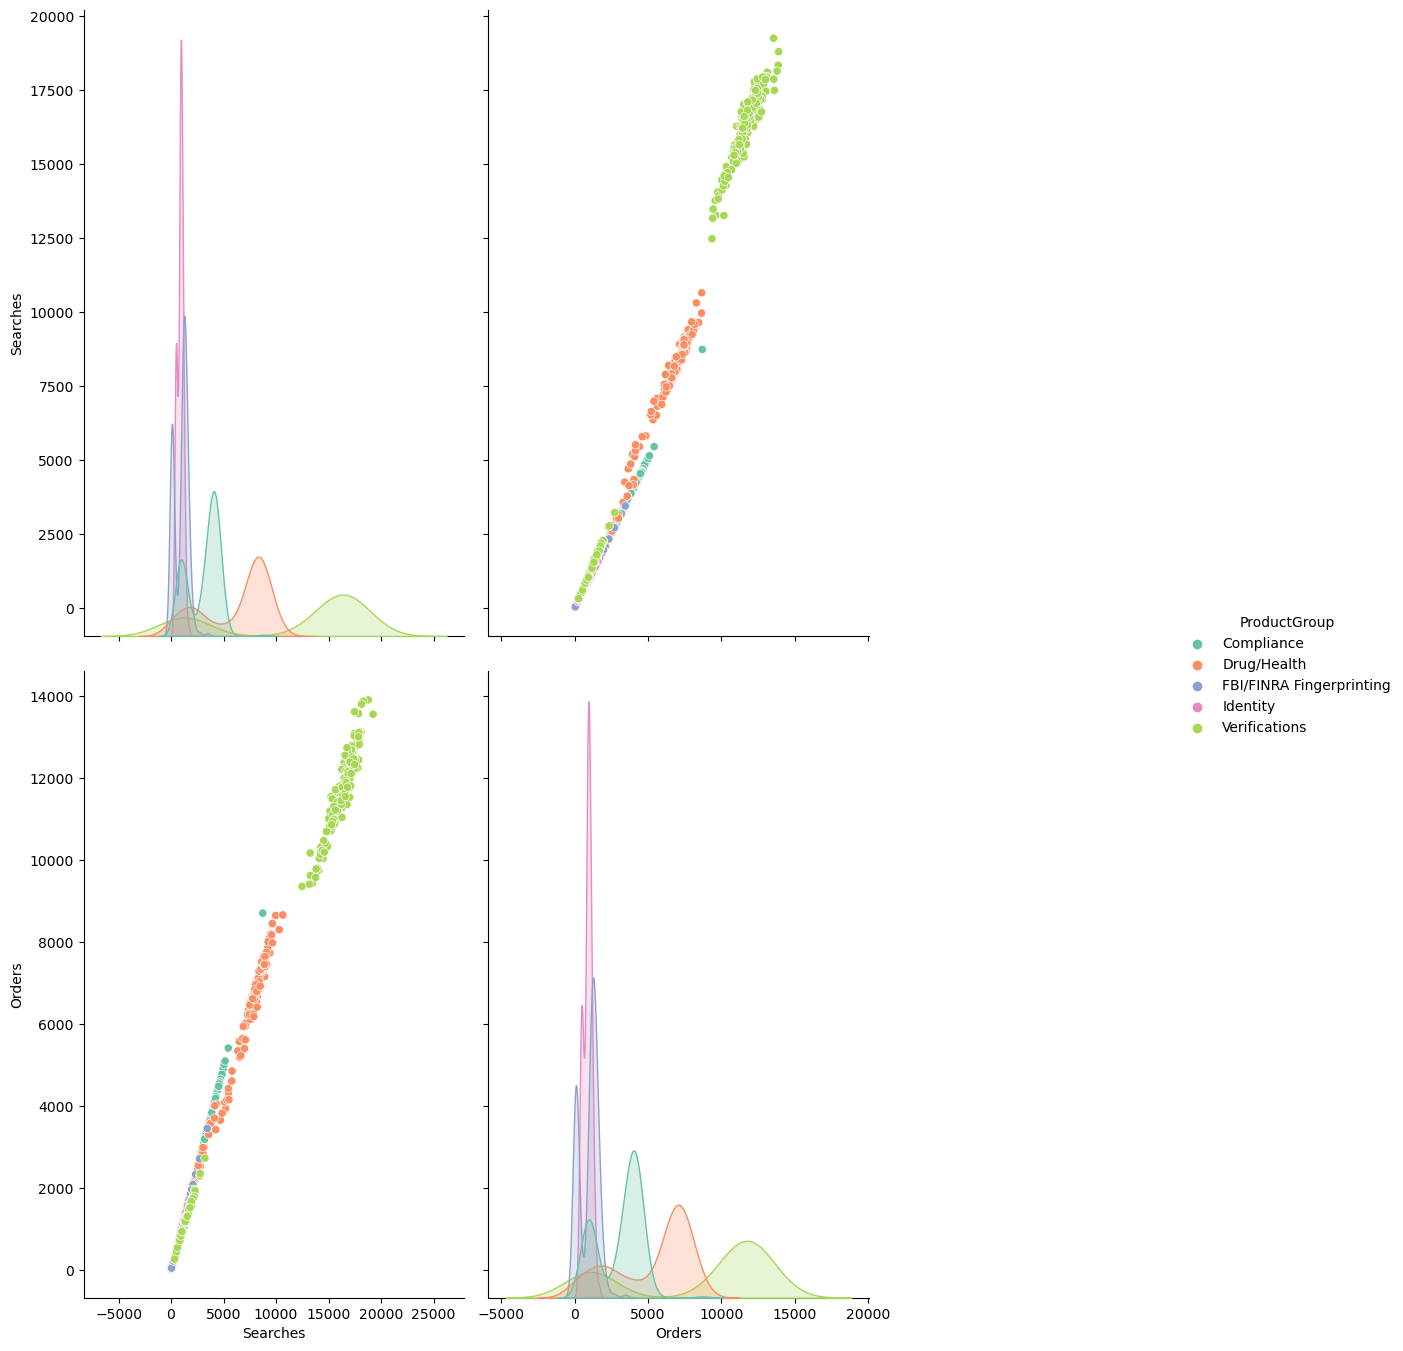

In [14]:
sns.set_palette("Set2") 

pp = sns.pairplot(df[df['ProductGroup'] != 'Public Records'], hue="ProductGroup")

pp.fig.set_size_inches(15,15)

In [15]:
# Pick a Product Category to Work with.

df2 = df[df['ProductGroup'] == 'Identity']

In [16]:
timeframes = ['CompletedDate', 'CompletedWeek', 'CompletedMonth', 'CompletedQuarter'] 

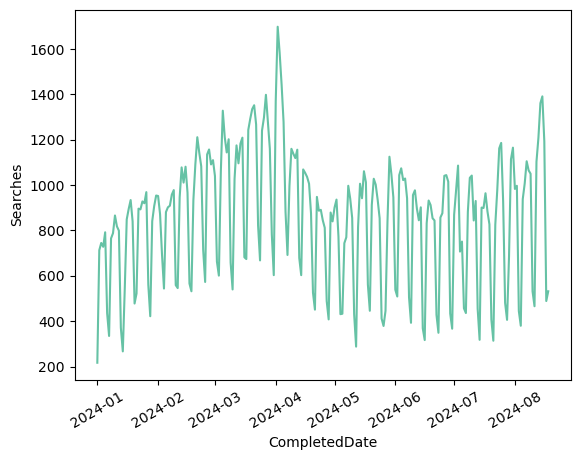

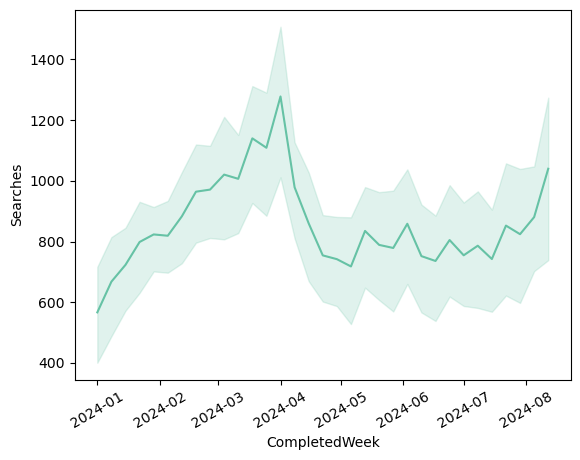

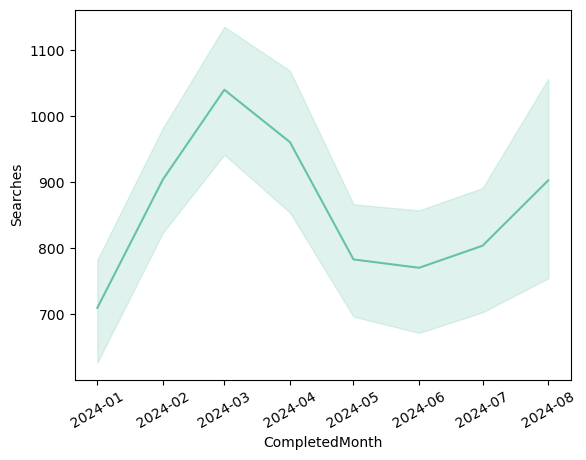

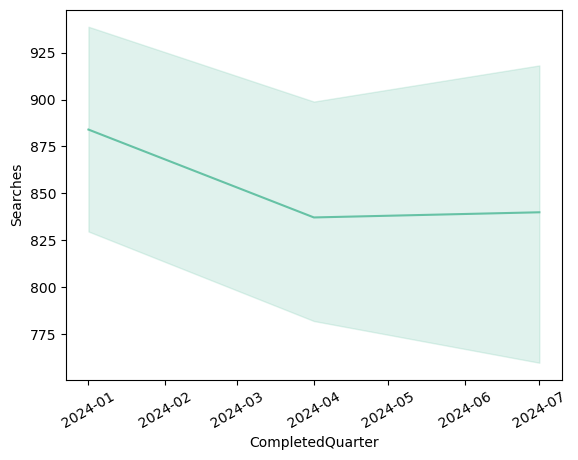

In [17]:
for tf in timeframes:
    sns.lineplot(data = df2, x = df2[tf], y = df2['Searches'])
    plt.xticks(rotation=30)
    plt.show()

In [18]:
df2['rollingMean'] = df2.Searches.rolling(window = 7).mean()
df2['rollingstd'] = df2.Searches.rolling(window = 7).std()

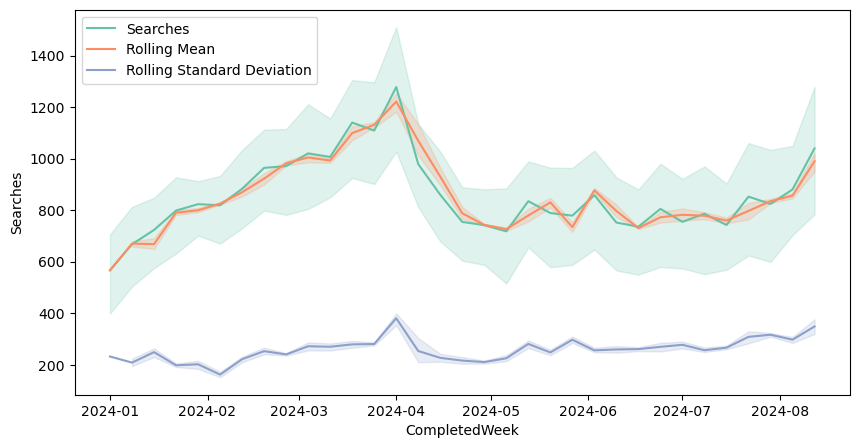

In [19]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df2, x = df2['CompletedWeek'], y = df2['Searches'], label = "Searches")
sns.lineplot(data = df2, x = df2['CompletedWeek'], y = df2['rollingMean'], label = "Rolling Mean")
sns.lineplot(data = df2, x = df2['CompletedWeek'], y = df2['rollingstd'], label = "Rolling Standard Deviation")
plt.legend(loc = 'upper left')

# Select Analysis Data

In [20]:
# Group DF2 by Timeframe
df3 = df2.groupby(['CompletedWeek'], as_index=False)['Searches'].sum()

In [21]:
data = pd.Series(df3['Searches']).set_axis(df3['CompletedWeek'])

# Stationarity Analysis w/ ADF, ACF/PACF Plots

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adf = adfuller(data)
print(adf)

(-2.2612777702458704, 0.1847608397224147, 0, 32, {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}, 354.5050380026531)


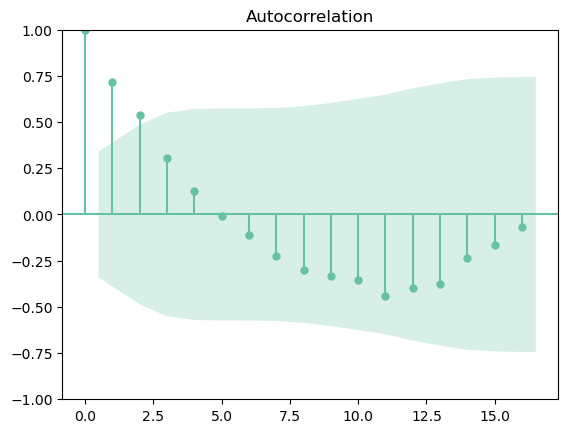

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
#plot_pacf(data)
plt.show()

# Time Series Decomposition & Anomaly Detection

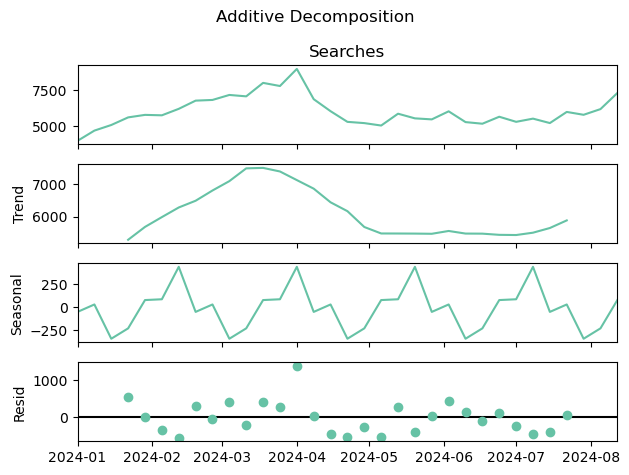

In [25]:
# To further examine our seasonality, let's decompose our data.
from statsmodels.tsa.seasonal import seasonal_decompose

ad = seasonal_decompose(data, model = 'additive', period = 7)
ad.plot()
plt.suptitle('Additive Decomposition')
plt.tight_layout(rect = [0, 0, 1, 1])

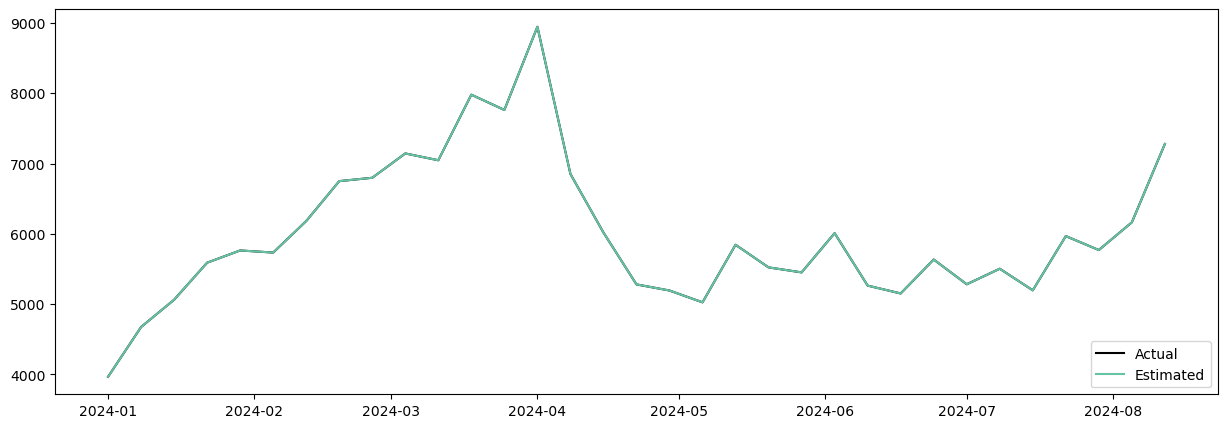

In [38]:
from statsmodels.tsa.seasonal import STL
stl = STL(data)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid
estimated = seasonal+trend

plt.figure(figsize=(15, 5))
plt.plot(data, label='Actual', color = 'black')
plt.plot(estimated, label = 'Estimated')
plt.legend(loc = 'lower right')

(19723.0, 19814.0)

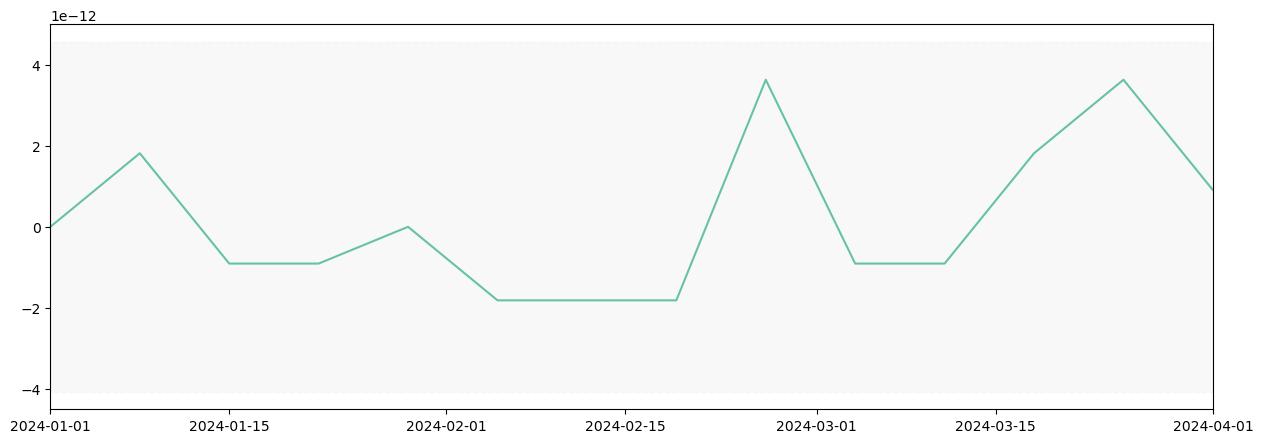

In [39]:
# Residuals outside 3 standard Deviations are outliers

resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev #lower limit is 3 standard deviations away from the mean
upper = resid_mu + 3*resid_dev #upper limit is 3 standard deviations away from the mean

plt.figure(figsize=(15, 5))
plt.plot(resid)

plt.fill_between([data.idxmin(), data.idxmax()], lower, upper, color='gray', alpha = .05, linestyle = "--")
plt.xlim(data.idxmin(), data.idxmax())

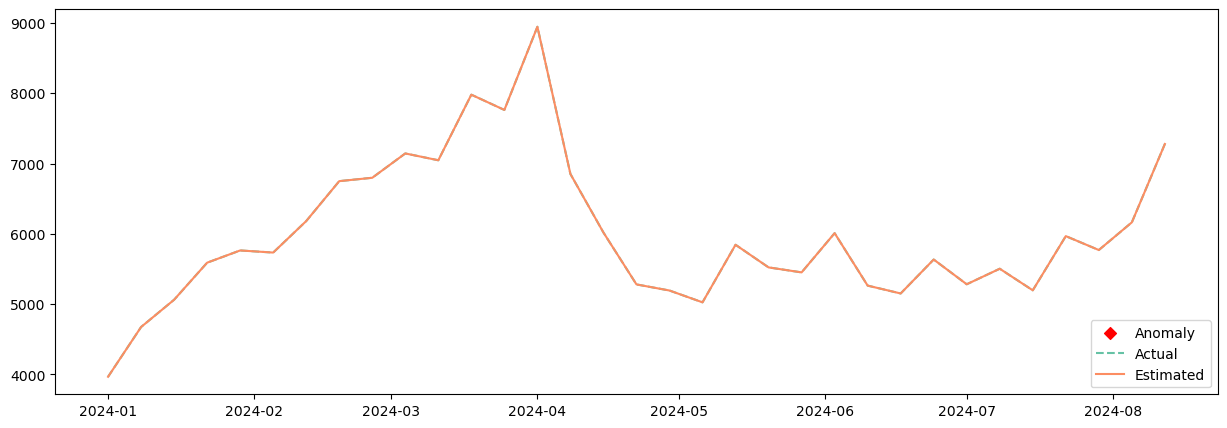

In [40]:
#Plot anomalies on original data

anomalies = data[(resid < lower)|(resid > upper)]
plt.figure(figsize=(15, 5))
plt.scatter(anomalies.index, anomalies.values, color = 'r', marker = 'D', label = 'Anomaly')
plt.plot(data, label='Actual', linestyle = '--')
plt.plot(estimated, label = 'Estimated')

plt.legend(loc = 'lower right')

# Differencing Data

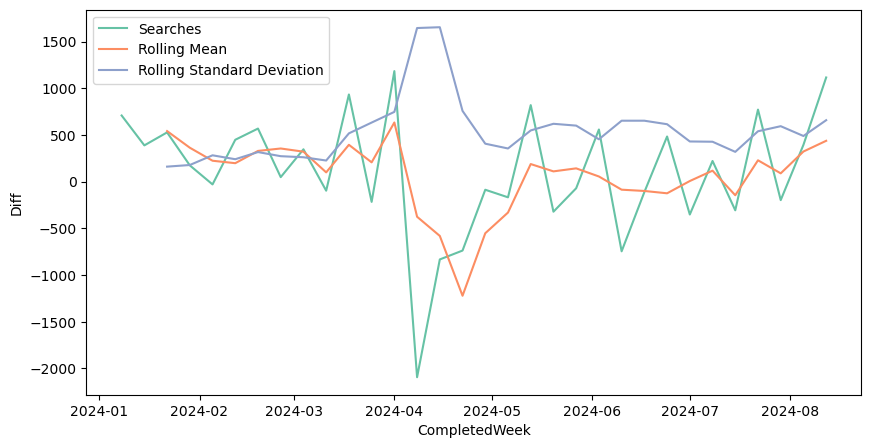

In [27]:
df4 = df3

df4['Diff'] = df4['Searches'].diff()
df4

df4['rollingMean'] = df4.Diff.rolling(window = 3).mean()
df4['rollingstd'] = df4.Diff.rolling(window = 3).std()
df4

plt.figure(figsize = (10, 5))
sns.lineplot(data = df4, x = df4['CompletedWeek'], y = df4['Diff'], label = "Searches")
sns.lineplot(data = df4, x = df4['CompletedWeek'], y = df4['rollingMean'], label = "Rolling Mean")
sns.lineplot(data = df4, x = df4['CompletedWeek'], y = df4['rollingstd'], label = "Rolling Standard Deviation")
plt.legend(loc = 'upper left')

In [28]:
data2 = pd.Series(df4['Diff']).set_axis(df4['CompletedWeek']).dropna()

adf = adfuller(data2)
print(adf)

(-5.732919892071696, 6.537153967610498e-07, 0, 31, {'1%': -3.661428725118324, '5%': -2.960525341210433, '10%': -2.6193188033298647}, 340.17341173457646)


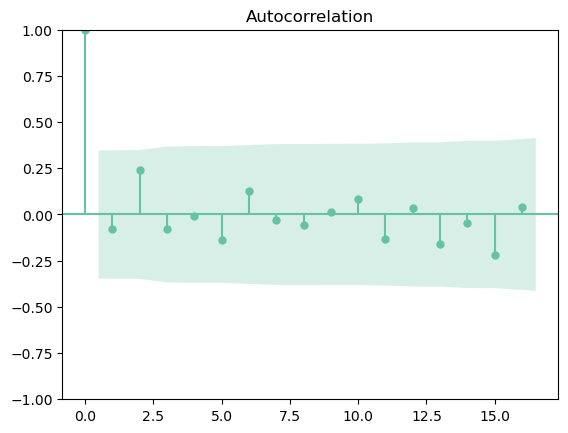

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data2)
#plot_pacf(data2)
plt.show()

# Training and Testing Sets

In [30]:
train = data[:round(len(data)*.70)]
test = data[round(len(data)*.70):]
print(f'Train Size: {len(train)}, Test Size: {len(test)}')

Train Size: 23, Test Size: 10


In [31]:
test

CompletedWeek
2024-06-10    5263
2024-06-17    5151
2024-06-24    5634
2024-07-01    5282
2024-07-08    5503
2024-07-15    5196
2024-07-22    5967
2024-07-29    5769
2024-08-05    6163
2024-08-12    7278
Name: Searches, dtype: int64

# Scaled Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.fit_transform(test.values.reshape(-1, 1))

# SARIMAX Modeling

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_scaled, seasonal_order = (0, 1, 1, 6))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   23
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 6)   Log Likelihood                 -18.512
Date:                             Thu, 22 Aug 2024   AIC                             43.023
Time:                                     17:40:00   BIC                             45.523
Sample:                                          0   HQIC                            43.272
                                              - 23                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9473      0.429      2.207      0.027       0.106       1.789
ma.S.L6       -0.9929     4

In [34]:
# Forecasts

forecast_steps = len(test)
forecast_scaled = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test.index

fvs = forecast_scaled.predicted_mean
fvd = scaler.inverse_transform(fvs.reshape(-1, 1))
forecast_values = pd.Series(fvd.flatten(), index = forecast_index)

In [35]:
forecast_values

CompletedWeek
2024-06-10    5723.860355
2024-06-17    5647.048711
2024-06-24    6029.265778
2024-07-01    5701.844349
2024-07-08    5637.569200
2024-07-15    5563.455013
2024-07-22    5627.820842
2024-07-29    5556.072917
2024-08-05    5943.086715
2024-08-12    5620.209108
dtype: float64

In [36]:
# Confidence Intervals

cis = forecast_scaled.conf_int()
cid = scaler.inverse_transform(cis)
ciLower = pd.Series(cid[:,0], index = forecast_index)
ciUpper = pd.Series(cid[:,1], index = forecast_index)

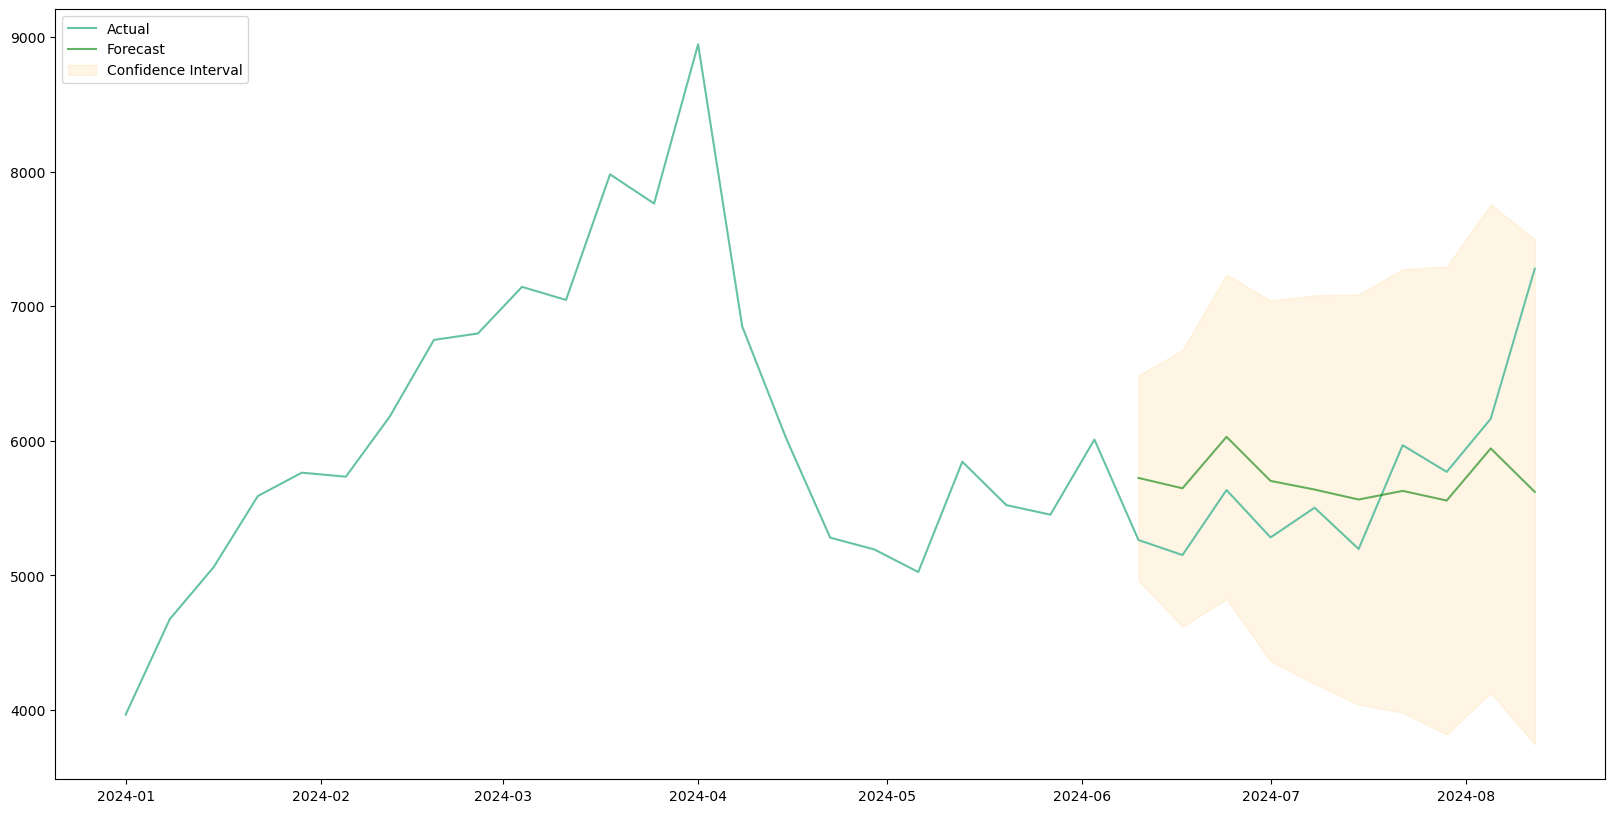

In [37]:
plt.figure(figsize = (20, 10))

#Plot our Actual Data
plt.plot(data.index, data, label = 'Actual')

#Plot forecasted Data
plt.plot(forecast_values.index, forecast_values, label = 'Forecast', color = 'green', alpha = .6)

#Plot Confidence Intervals
plt.fill_between(ciLower.index, ciLower, ciUpper, color = 'orange', alpha = .1, label = 'Confidence Interval')

plt.legend(loc = 'upper left')
plt.show()